In [1]:
library(forecast)

In [2]:
dataset = read.csv("../../dengueData/Iquitos/iquitos_training_data.csv")
dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases
2000/2001,1,2000-07-01,0,0,0,0,0,0
2000/2001,2,2000-07-08,0,0,0,0,0,0
2000/2001,3,2000-07-15,0,0,0,0,0,0
2000/2001,4,2000-07-22,0,0,0,0,0,0
2000/2001,5,2000-07-29,0,0,0,0,0,0
2000/2001,6,2000-08-05,0,0,0,0,0,0
2000/2001,7,2000-08-12,0,0,0,0,0,0
2000/2001,8,2000-08-19,0,0,0,0,0,0
2000/2001,9,2000-08-26,0,0,0,0,0,0
2000/2001,10,2000-09-02,0,0,0,0,0,0


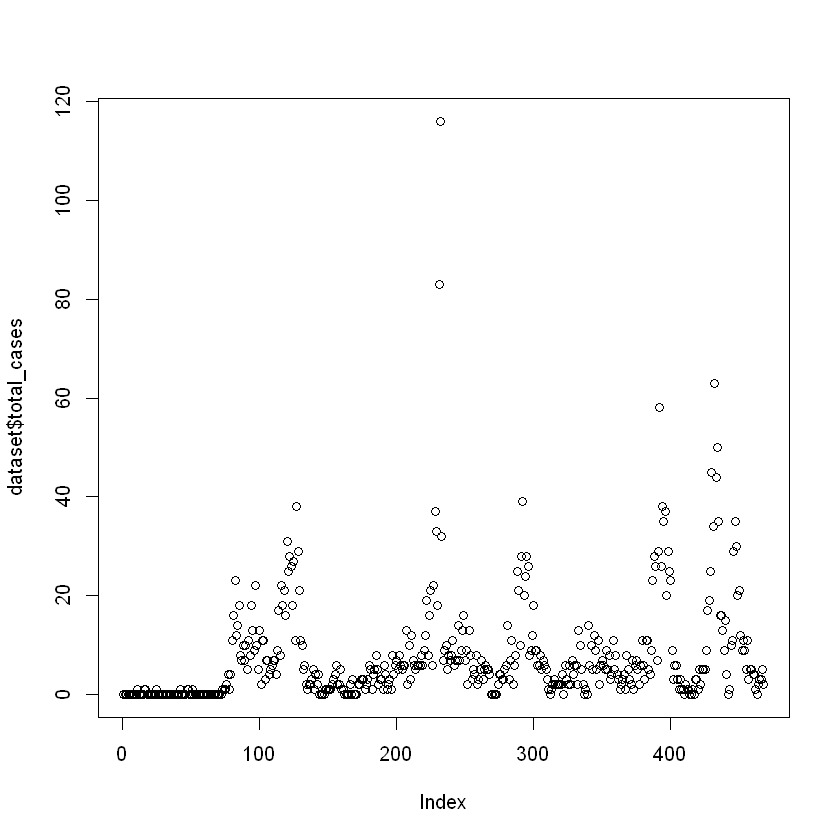

In [3]:
plot(dataset$total_cases)

In [4]:
window_size = 4
split_index = floor(0.7 * nrow(dataset))
lag_weeks = 3
train = dataset$total_cases[1:(split_index+window_size)]
test = dataset$total_cases[(split_index+window_size+lag_weeks):(nrow(dataset))]

length(train)
length(test)

[1] 331

[1] 135

In [5]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
# for(index in 1:10) {
    fit <- auto.arima(dataset$total_cases[1:trainIndex+index-1])
    fcast <- forecast(fit, h=3)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[3]
}

In [6]:
length(predictions)

predictions

[1] 135

[1]  4.893515  3.841717  7.693257  7.091627  6.530025  5.041609  3.718776
  [8]  3.202754  2.191815  6.988881  4.800360  7.566564  5.582394  8.720620
 [15]  7.565444  6.920300  8.339777  5.657153  6.819094  6.534709  6.532654
 [22]  6.148009  7.294037  6.182716  7.238072  5.586225  5.900186  7.584092
 [29]  6.189181  7.334893  5.941822  5.727040  4.676325  4.721830  4.724345
 [36]  5.043228  4.205275  6.247805  5.489811  5.350213  4.808914  6.167195
 [43]  4.473766  6.040019  6.150071  6.035054  5.167646  6.151978  7.560043
 [50]  6.637539  6.005712  7.957447  8.143742  7.003153  6.560908  7.603010
 [57] 11.719054 14.287115 15.442141 10.691676 16.715092 25.722331 22.168201
 [64] 25.608559 23.159062 23.663222 17.298692 17.225185 16.428549 15.569694
 [71] 11.185462  6.470194  5.378796  5.437370  5.372752  5.099970  5.524155
 [78]  5.193999  4.946278  4.557562  4.868128  4.911933  4.816944  4.528777
 [85]  4.236100  4.391971  4.228280  5.075067  5.666301  5.222803  6.162135
 [92]  5.756273  6.217707  6.774823  6.736108  7.584502 11.313476 11.920461
 [99] 14.859188 22.686152 21.052520 36.111827 34.285942 32.509646 27.754047
[106] 19.284150 16.655719 13.589571 11.133152 12.469806  8.203611  5.485023
[113]  5.505454  8.382668 10.293957 16.420233 19.954750 20.092086 16.892626
[120] 16.992631 12.792359 11.070943  8.642774  8.556795  7.755045  8.799669
[127]  7.323963  5.742745  4.820695  4.358364  4.224998  2.076579  1.109689
[134]  5.004863  5.306013

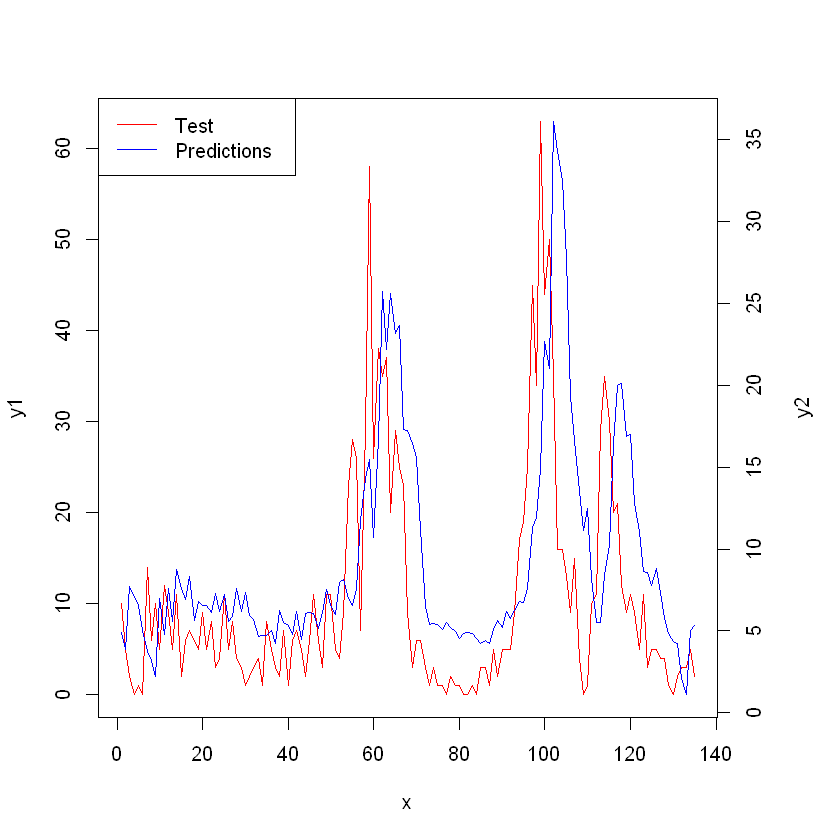

In [7]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [9]:
library(MLmetrics)
mse = MSE(predictions, test)
mse

[1] 108.7753